In [17]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from_date = '2018-11-14'
end_date = '2018-11-27'

PATH = '/home/phongdk/data_user_income_targeting'
if not os.path.exists(PATH):
    os.makedirs(PATH)

filename_demography = "demography_from_{}_to_{}.csv.gz".format(from_date, end_date)
filename_hardware_location = "hardware_lat_lon_from_{}_to_{}.csv.gz".format(from_date, end_date)

filename_airline = "airline_from_{}_to_{}.csv.gz".format(from_date, end_date)
filename_luxury = "luxury_from_{}_to_{}.csv.gz".format(from_date, end_date)
filename_booking_resort = "booking_resort_from_{}_to_{}.csv.gz".format(from_date, end_date)
filename_booking_hotel = "booking_hotel_from_{}_to_{}.csv.gz".format(from_date, end_date)
filename_tour = "tour_from_{}_to_{}.csv.gz".format(from_date, end_date)
filename_shopping = "shopping_from_{}_to_{}.csv.gz".format(from_date, end_date)

# Visulize histogram of each property

In [26]:
def show_histogram(df, filename):
    sns.distplot(df['count'])
    plt.title(filename.split('_')[:-4])

In [13]:
df_airline = pd.read_csv(os.path.join(PATH, filename_airline))
df_luxury = pd.read_csv(os.path.join(PATH, filename_luxury))
df_booking_resort = pd.read_csv(os.path.join(PATH, filename_booking_resort))
df_booking_hotel = pd.read_csv(os.path.join(PATH, filename_booking_hotel))
df_tour = pd.read_csv(os.path.join(PATH, filename_tour))
df_shopping = pd.read_csv(os.path.join(PATH, filename_shopping))

In [18]:
gs = gridspec.GridSpec(nrows=3, ncols=2)

In [20]:
filenames = [filename_airline, filename_luxury, filename_booking_resort, 
             filename_booking_hotel, filename_tour, filename_shopping]
list_df = [pd.read_csv(os.path.join(PATH,filename)) for filename in filenames]


### Almost COUNT is less than 10

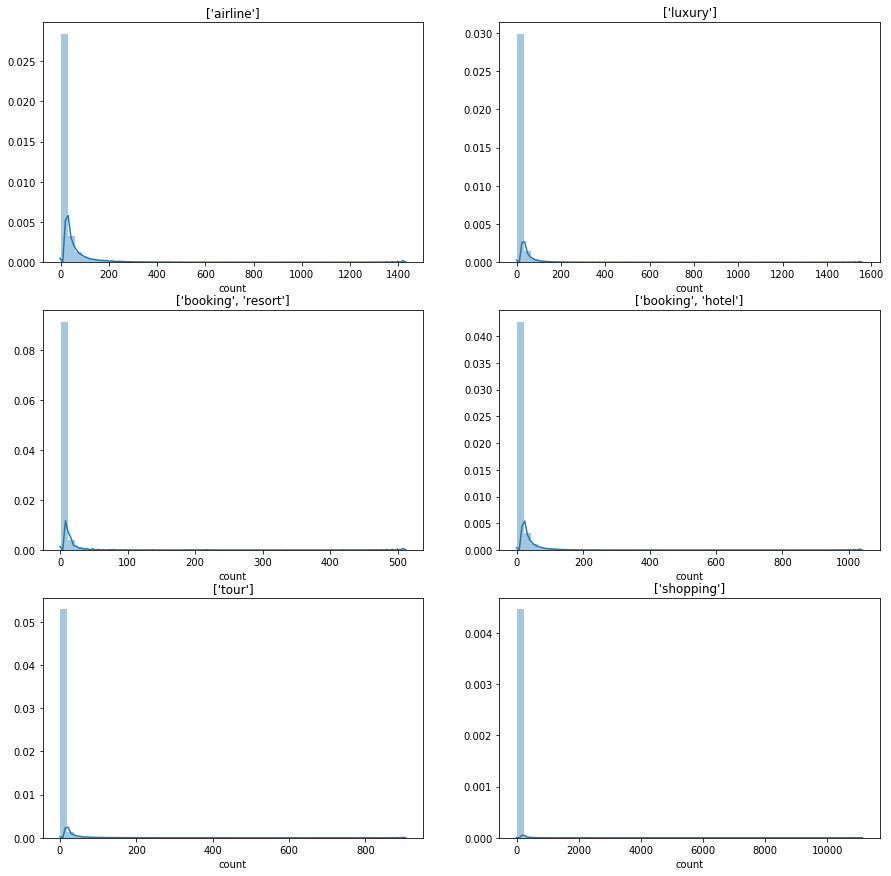

In [27]:
plt.figure(figsize=(15,15))
for i in range(3):
    for j in range(2):
        plt.subplot(gs[i,j])
        show_histogram(list_df[i*2+j], filenames[i*2+j])

### Proportion of NCOUNT <=10
- 57% - 77% for airline, luxury, hotel, shopping
- 91% - 92% for resort, tour

--> We should define a threshold to seperate potential customers from viewing customers
- E.g: T_resort_tour = 8, T_shopping=20, T_airline=15, T_luxury_hotel = 10

In [36]:
for filename, df in zip(filenames, list_df):
    print(' '.join(filename.split('_')[:-4]), len(df[df['count'] < 10])/ len(df))

airline 0.5514729693579196
luxury 0.7272055585457748
booking resort 0.9130945390487375
booking hotel 0.7590012102467558
tour 0.899030646035282
shopping 0.6031629791906787


In [33]:
THRESHOLD = [15, 10, 8, 10, 8, 20]

In [35]:
for filename, df, threshold in zip(filenames, list_df, THRESHOLD):
    print(' '.join(filename.split('_')[:-4]), len(df[df['count'] < threshold])/ len(df))

airline 0.6600883265359759
luxury 0.7272055585457748
booking resort 0.8807007242121746
booking hotel 0.7590012102467558
tour 0.8699379854295863
shopping 0.7566887457892737
